In [8]:
%pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

unsupervised_data = pd.read_csv("Data.csv")
unsupervised_data = unsupervised_data.dropna()
#supervised_data = pd.read_csv("SupervisedData.csv")

In [10]:
def LinearAnalysis(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    return y_pred

/tmp/ipykernel_1901/991151730.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UDWithout['Handicap'] = mean_handicap_without
/tmp/ipykernel_1901/991151730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UDWith['Handicap'] = mean_handicap_with


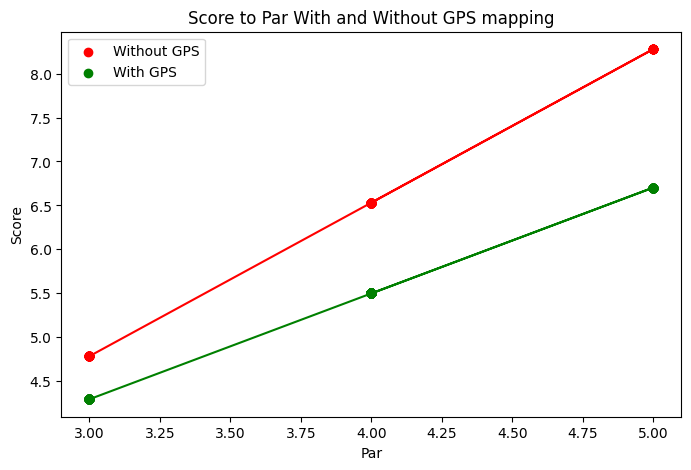

In [11]:
UDWithout = unsupervised_data[unsupervised_data['With_Or_Without'] == 0]
UDWith = unsupervised_data[unsupervised_data['With_Or_Without'] == 1]

mean_handicap_without = UDWithout['Handicap'].mean()
mean_handicap_with = UDWith['Handicap'].mean()
UDWithout['Handicap'] = mean_handicap_without
UDWith['Handicap'] = mean_handicap_with

X_Without = UDWithout[['Par', 'Handicap']]
y_without = UDWithout['Score']
X_With = UDWith[['Par', 'Handicap']]
y_with = UDWith['Score']

y_pred_without = LinearAnalysis(X_Without, y_without)

plt.figure(figsize=(8,5))
plt.scatter(X_Without['Par'], y_pred_without, color="red", label="Without GPS")
plt.plot(X_Without['Par'], y_pred_without, color="red")

y_pred_with = LinearAnalysis(X_With, y_with)

plt.scatter(X_With['Par'], y_pred_with, color="green", label="With GPS")
plt.plot(X_With['Par'], y_pred_with, color="green")

plt.xlabel('Par')
plt.ylabel('Score')
plt.title("Score to Par With and Without GPS mapping")
plt.legend()
plt.show()

In [12]:
def SignificanceTest(Without, With):
    Without_3 = Without[Without['Par'] == 3]
    print("Without using Par 3's number of samples:", Without_3.shape[0])
    With_3 = With[With['Par'] == 3]
    print("With using Par 3's number of samples:", With_3.shape[0])
    y_Without_3 = Without_3[['Score']].to_numpy()
    y_With_3 = With_3[['Score']].to_numpy()
    Without_4 = Without[Without['Par'] == 4]
    print("Without using Par 4's number of samples:", Without_4.shape[0])
    With_4 = With[With['Par'] == 4]
    print("With using Par 4's number of samples:", With_4.shape[0])
    y_Without_4 = Without_4[['Score']].to_numpy()
    y_With_4 = With_4[['Score']].to_numpy()
    Without_5 = Without[Without['Par'] == 5]
    print("Without using Par 5's number of samples:", Without_5.shape[0])
    With_5 = With[With['Par'] == 5]
    print("With using Par 5's number of samples:", With_5.shape[0])
    y_Without_5 = Without_5[['Score']].to_numpy()
    y_With_5 = With_5[['Score']].to_numpy()

    print("\n\n\nWelch's t-test")
    t_stat3, p_value3 = stats.ttest_ind(y_Without_3, y_With_3)
    print("Par 3 T-Test")
    print("t-statistic:", t_stat3)
    print("Statistical Significance:", p_value3)

    t_stat4, p_value4 = stats.ttest_ind(y_Without_4, y_With_4)
    print("Par 4 T-Test")
    print("t-statistic:", t_stat4)
    print("Statistical Significance:", p_value4)

    t_stat5, p_value5 = stats.ttest_ind(y_Without_5, y_With_5)
    print("Par 5 T-Test")
    print("t-statistic:", t_stat5)
    print("Statistical Significance:", p_value5)

    print("\n\n\nMann Whitney U Test")
    u_stat3, pu_value3 = stats.mannwhitneyu(y_Without_3, y_With_3, alternative='two-sided')
    print("Par 3 Mann-Whitney U Test")
    print("U Value", u_stat3)
    print("Statistical Significance:", pu_value3)

    u_stat4, pu_value4 = stats.mannwhitneyu(y_Without_4, y_With_4, alternative='two-sided')
    print("Par 4 Mann-Whitney U Test")
    print("U Value", u_stat4)
    print("Statistical Significance:", pu_value4)

    u_stat5, pu_value5 = stats.mannwhitneyu(y_Without_5, y_With_5, alternative='two-sided')
    print("Par 5 Mann-Whitney U Test")
    print("U Value", u_stat5)
    print("Statistical Significance:", pu_value5)

    P3Without = sns.displot(Without_3, kind="hist", fill=True, color="red", x="Score", binwidth=1, binrange=(0.5,10.5))
    P3With = sns.displot(With_3, kind="hist", fill=True, color="green", x="Score", binwidth=1, binrange=(0.5,10.5))
    P4Without = sns.displot(Without_4, kind="hist", fill=True, color="red", x="Score", binwidth=1, binrange=(0.5,16.5))
    P4With = sns.displot(With_4, kind="hist", fill=True, color="green", x="Score", binwidth=1, binrange=(0.5,16.5))
    P5Without = sns.displot(Without_5, kind="hist", fill=True, color="red", x="Score", binwidth=1, binrange=(0.5,16.5))
    P5With = sns.displot(With_5, kind="hist", fill=True, color="green", x="Score", binwidth=1, binrange=(0.5,16.5))

    P3Without.figure.suptitle("Score on Par 3's without GPS", fontsize=16)
    P3Without.figure.tight_layout()
    P3Without.figure.subplots_adjust(top=0.9)
    P3With.figure.suptitle("Score on Par 3's with GPS", fontsize=16)
    P3With.figure.tight_layout()
    P3With.figure.subplots_adjust(top=0.9)

    P4Without.figure.suptitle("Score on Par 4's without GPS", fontsize=16)
    P4Without.figure.tight_layout()
    P4Without.figure.subplots_adjust(top=0.9)
    P4With.figure.suptitle("Score on Par 4's with GPS", fontsize=16)
    P4With.figure.tight_layout()
    P4With.figure.subplots_adjust(top=0.9)

    P5Without.figure.suptitle("Score on Par 5's without GPS", fontsize=16)
    P5Without.figure.tight_layout()
    P5Without.figure.subplots_adjust(top=0.9)
    P5With.figure.suptitle("Score on Par 5's with GPS", fontsize=16)
    P5With.figure.tight_layout()
    P5With.figure.subplots_adjust(top=0.9)
   

T-Test
T-Statistic difference relative to variation of sample. Great magnitude the grate the evidence against the Null
P-Value confidence margin. The closer to 0 the more confident.
Not good as not normal distribution

Mann Whitney U Test
U Value difference between 2 total ranks. The Smaller then the less likely to have occurred by chance
P-Value confidence margin. The closer to 0 the more confident.

Without using Par 3's number of samples: 43
With using Par 3's number of samples: 97
Without using Par 4's number of samples: 84
With using Par 4's number of samples: 281
Without using Par 5's number of samples: 17
With using Par 5's number of samples: 72



Welch's t-test
Par 3 T-Test
t-statistic: [2.87172877]
Statistical Significance: [0.00472713]
Par 4 T-Test
t-statistic: [5.85152507]
Statistical Significance: [1.08893618e-08]
Par 5 T-Test
t-statistic: [5.19424226]
Statistical Significance: [1.33752287e-06]



Mann Whitney U Test
Par 3 Mann-Whitney U Test
U Value [2713.]
Statistical Significance: [0.00300443]
Par 4 Mann-Whitney U Test
U Value [15963.]
Statistical Significance: [4.53312259e-07]
Par 5 Mann-Whitney U Test
U Value [1038.5]
Statistical Significance: [4.64940359e-06]


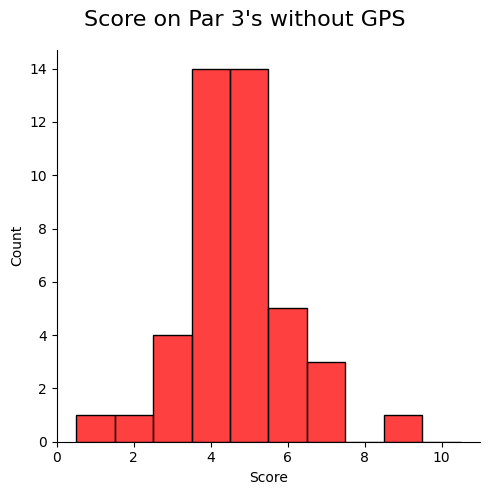

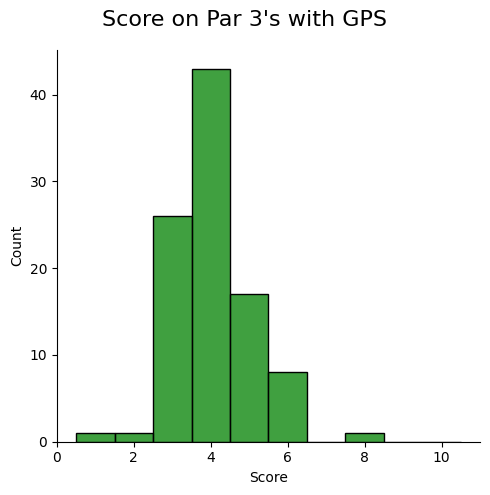

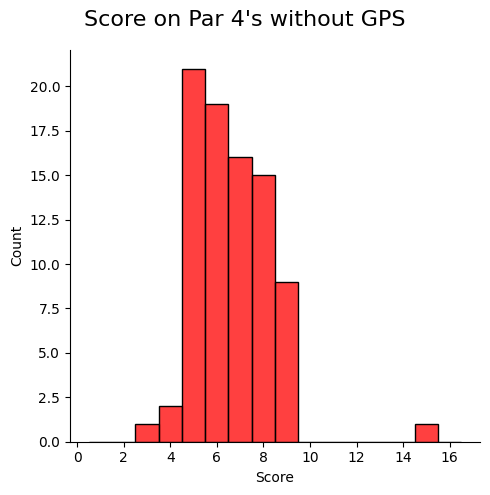

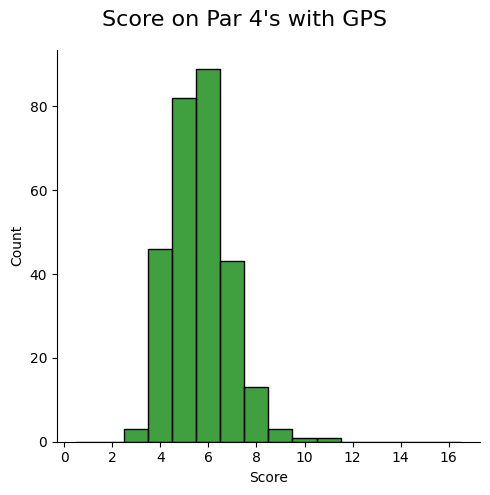

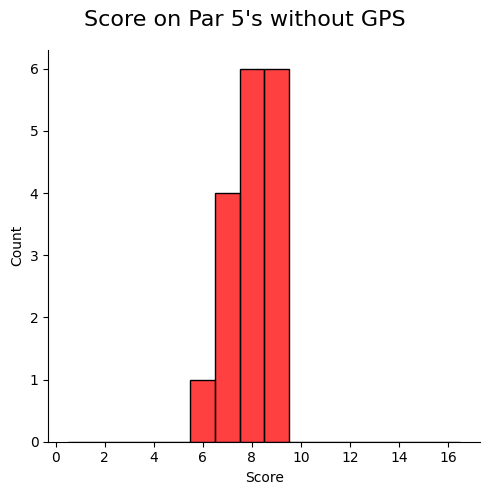

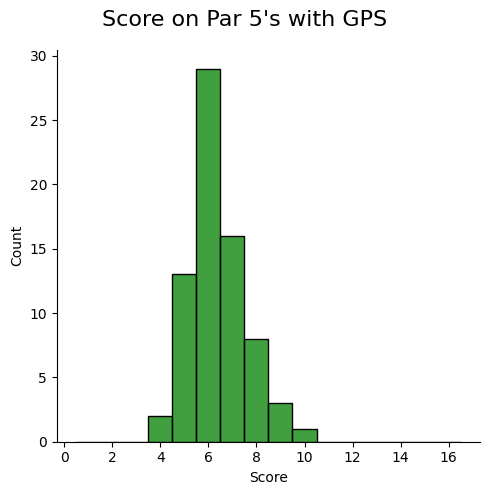

In [13]:
SignificanceTest(UDWithout, UDWith)

In [14]:
#sns.displot(y_Without_3, label="Par 3 without GPS", fill=True, color="red")
#sns.kdeplot(y_With_3, label="Par 3 with GPS", fill=True, color="green")
#plt.legend()
#plt.title('Par 3 data distributions')
#plt.xlabel('Score')
#plt.ylabel('Instances')
#plt.show()